## Import Needed Libraries

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# processing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")

## Load Dataset and take a quick look

In [2]:
df = pd.read_csv("cell_samples.csv")
df.head(7)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2


In [3]:
df.shape

(699, 11)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           683 non-null    int64
 1   Clump        683 non-null    int64
 2   UnifSize     683 non-null    int64
 3   UnifShape    683 non-null    int64
 4   MargAdh      683 non-null    int64
 5   SingEpiSize  683 non-null    int64
 6   BareNuc      683 non-null    int32
 7   BlandChrom   683 non-null    int64
 8   NormNucl     683 non-null    int64
 9   Mit          683 non-null    int64
 10  Class        683 non-null    int64
dtypes: int32(1), int64(10)
memory usage: 61.4 KB


In [5]:
df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [6]:
df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

### Visualize data

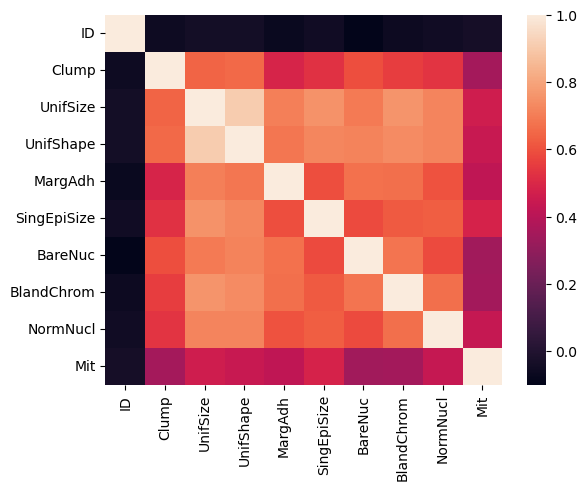

In [37]:
df0 = df.drop(['Class'], axis=1)
sns.heatmap(df0.corr())
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

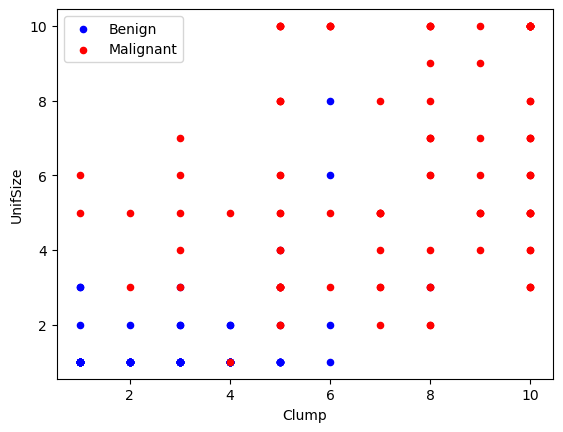

In [25]:
# Visualize cells
benign_cell = df[df['Class']==2][0:100]
malignant_cell = df[df['Class']==4][0:100]

ax_benign = benign_cell.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Benign')
malignant_cell.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='Malignant', ax=ax_benign)

###  Data Processing

In [26]:
# check data types
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [29]:
# casting into numeric
df = df[pd.to_numeric(df['BareNuc'], errors='coerce', downcast='integer').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')

In [30]:
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

## Feature Selection

In [48]:
X = df[['Clump','UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
y = df['Class']

## Splitting Data

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

In [74]:
clf = SVC(C=1, kernel ='linear', gamma='auto')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [95]:
print(accuracy_score(y_test, y_pred))

0.9635036496350365


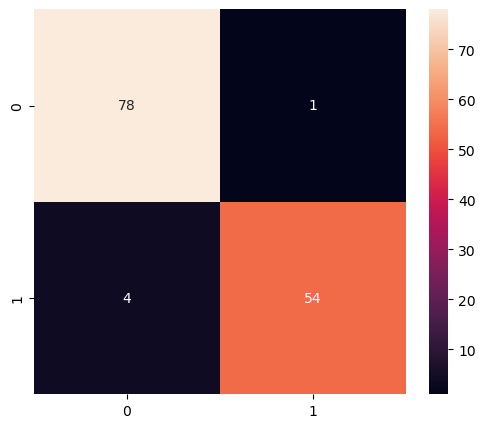

In [77]:
# creating confusion matrix 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d');

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.95      0.99      0.97        79
           4       0.98      0.93      0.96        58

    accuracy                           0.96       137
   macro avg       0.97      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



## check for OF

In [80]:
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)

In [88]:
print("Train score is: ", train_score*100, '%')
print('='*35)
print("Test score is: ", test_score*100, '%')

Train score is:  97.43589743589743 %
Test score is:  96.35036496350365 %
